In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10) #configurando tamanho e fonte dos gráficos
plt.rcParams.update({'font.size': 22})

# Métodos Numéricos

## Ajuste de curvas - terceiro exemplo

### Patric Lacouth

# o problema 

A população em milhões dos Estados Unidos de 1920 a 2000 pode ser tabulada como

Data|População
-------|------
1920|106,46
1930|123,08
1940|132,12
1950|152,27
1960|180,67
1970|205,05
1980|227,23
1990|249,46
2000|281,42

Ajuste um polinômio de sétimo grau aos 8 primeiros pontos (1920 a 1990). Use-o para calcular a população em 2000 

# implementando em Python
## importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

criando os pontos

Data|População
-------|------
1920|106,46
1930|123,08
1940|132,12
1950|152,27
1960|180,67
1970|205,05
1980|227,23
1990|249,46

In [3]:
xi = np.array([1920,1930,1940,1950,1960,1970,1980,1990])
yi = np.array([106.46,123.08,132.12,152.27,180.65,205.05,227.23,249.46])
xi,yi

(array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]),
 array([106.46, 123.08, 132.12, 152.27, 180.65, 205.05, 227.23, 249.46]))

## montando o sistema

$$\left[ \begin{matrix}
N & \sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2\\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i^3 \\
\sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i^3 & \sum_{i=1}^N x_i^4
\end{matrix} \right]
\left[ \begin{matrix}
a_{1}\\
a_{2}\\
a_{3}
\end{matrix} \right]
=
\left[ \begin{matrix}
\sum_{i=1}^N y_i\\
\sum_{i=1}^N x_i y_i\\
\sum_{i=1}^N x_i^2 y_i
\end{matrix} \right]
$$


In [4]:
N = xi.shape[0]
sum_xi = np.sum(xi)
sum_xi2 = np.sum(xi ** 2)
sum_xi3 = np.sum(xi ** 3)
sum_xi4 = np.sum(xi ** 4)

sum_yi = np.sum(yi)
sum_xiyi = np.sum(xi * yi)
sum_xi2yi = np.sum(xi ** 2 * yi)

A = np.array([[N,sum_xi, sum_xi2],[sum_xi,sum_xi2,sum_xi3],[sum_xi2,sum_xi3,sum_xi4]], dtype = float)
b = np.array([sum_yi,sum_xiyi,sum_xi2yi], dtype = float)
A,b

(array([[8.0000000e+00, 1.5640000e+04, 3.0580400e+07],
        [1.5640000e+04, 3.0580400e+07, 5.9801104e+10],
        [3.0580400e+07, 5.9801104e+10, 1.1695932e+14]]),
 array([1.37632000e+03, 2.69955020e+06, 5.29565097e+09]))

# resolvendo o sistema

In [5]:
x = np.linalg.solve(A,b)
np.dot(A,x)

array([1.37632000e+03, 2.69955020e+06, 5.29565097e+09])

# criando a função do polinômio

In [6]:
x

array([ 3.37332600e+04, -3.64448815e+01,  9.85952394e-03])

In [7]:
def polinomio(x):
    return 3.37332600e+04 -3.64448815e+01 * x + 9.85952394e-03 * x**2

# traçando o gráfico

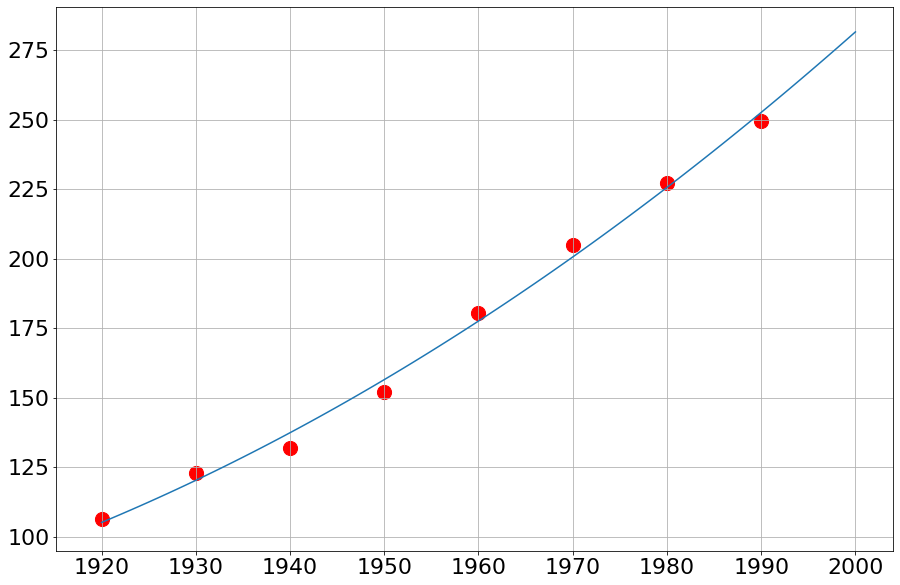

In [13]:
xa = np.arange(1920,2001,1)
ya = polinomio(xa)

plt.plot(xa,ya)
plt.scatter(xi,yi,c='red',s=200)
plt.grid(True)

# testando a aproximação para o ano 2000

Data|População
-------|------
1920|106,46
1930|123,08
1940|132,12
1950|152,27
1960|180,67
1970|205,05
1980|227,23
1990|249,46
2000|281,42

In [9]:
polinomio(2000)

281.59275999999227

# now, go code!